# Importing librairies and data

In [104]:
# Importing the libraries
import pandas as pd # Data manipulation
import matplotlib.pyplot as plt # Vizualisation
import seaborn as sns # Vizualisation
import missingno as msno # Visualization of missing values
from sqlalchemy import create_engine # Exporting your dataframe to PostgreSQL

In [79]:
# Loading the data
pd.set_option("display.max_columns",None)
data=pd.read_csv("data/telecom_customer_churn.csv")
df=data.copy()

In [80]:
# Displaying the first rows
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,NaN,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,NaN,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,NaN,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


# Overview of dataset

In [76]:
# Shape of data
df.shape

(7043, 38)

In [77]:
# Displaying the type of variables
df.dtypes

Customer ID                           object
Gender                                object
Age                                    int64
Married                               object
Number of Dependents                   int64
City                                  object
Zip Code                               int64
Latitude                             float64
Longitude                            float64
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download              float64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming 

In [44]:
# Is there duplicates ?
df.duplicated().sum()

0

## Missing Values

In [47]:
# Proportion of missing values in the columns
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)*100

Churn Reason                         73.463013
Churn Category                       73.463013
Offer                                55.047565
Internet Type                        21.666903
Unlimited Data                       21.666903
Streaming Music                      21.666903
Streaming Movies                     21.666903
Streaming TV                         21.666903
Premium Tech Support                 21.666903
Device Protection Plan               21.666903
Online Security                      21.666903
Avg Monthly GB Download              21.666903
Online Backup                        21.666903
Avg Monthly Long Distance Charges     9.683374
Multiple Lines                        9.683374
Contract                              0.000000
Age                                   0.000000
Customer Status                       0.000000
Total Revenue                         0.000000
Total Long Distance Charges           0.000000
Total Extra Data Charges              0.000000
Total Refunds

<Axes: >

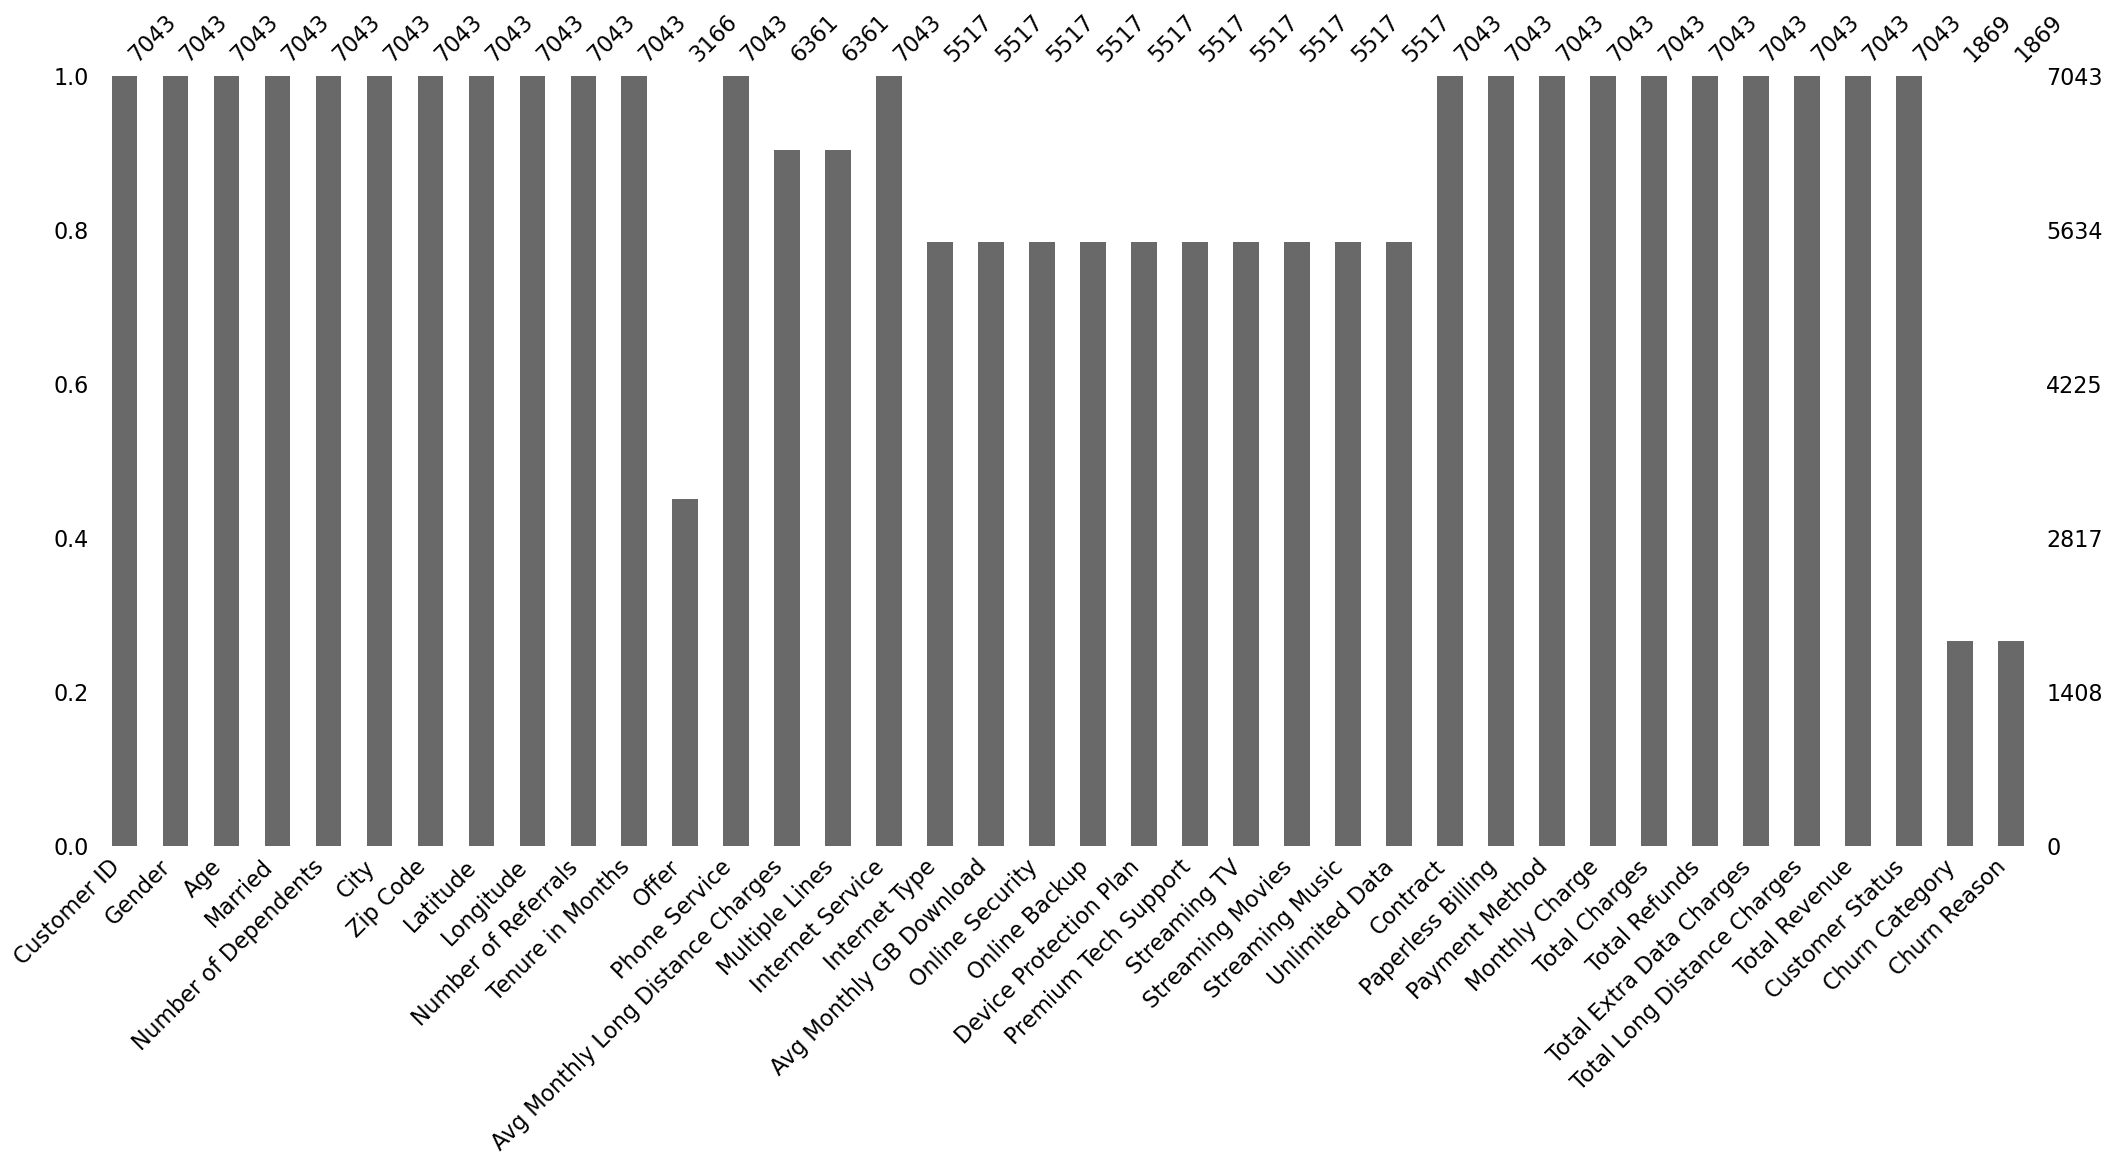

In [48]:
# Visualization of missing values
plt.figure(figsize=(10,10))
msno.bar(df)

# Data Processing

## Column processing

In [81]:
# Eliminate unnecessary columns
df.drop(["Customer ID","Zip Code","Latitude","Longitude"],axis=1, inplace=True)

In [82]:
# Replace space by underscore
df.columns = df.columns.str.replace(" ", "_")

## Handling Missing Values

In [83]:
# Replace missing values with 'No Churn'
df["Churn_Category"].fillna("No churn", inplace=True)
df["Churn_Reason"].fillna("No churn", inplace=True)

In [84]:
df[["Customer_Status","Churn_Reason","Churn_Category"]].head(10)

,Customer_Status,Churn_Reason,Churn_Category
0,Stayed,No churn,No churn
1,Stayed,No churn,No churn
2,Churned,Competitor had better devices,Competitor
3,Churned,Product dissatisfaction,Dissatisfaction
4,Churned,Network reliability,Dissatisfaction
5,Stayed,No churn,No churn
6,Stayed,No churn,No churn
7,Stayed,No churn,No churn
8,Stayed,No churn,No churn
9,Stayed,No churn,No churn


In [85]:
df["Offer"].unique()

array([nan, 'Offer E', 'Offer D', 'Offer A', 'Offer B', 'Offer C'],
      dtype=object)

In [86]:
# Replace missing values with 'None'
df["Offer"].fillna("None", inplace=True)

In [87]:
# Creating a list with columns with common missing values without "Average monthly Go downloads"

common_missing_columns = df[["Internet_Type", "Online_Security", "Online_Backup",
                             "Device_Protection_Plan", "Premium_Tech_Support",
                             "Streaming_TV", "Streaming_Movies", "Streaming_Music",
                             "Unlimited_Data"]]

In [88]:
# The unique values for these columns
for col in common_missing_columns:
    unique_values = common_missing_columns[col].unique()
    print(f"Unique values for the column '{col}':")
    print(unique_values)
    print("_" * 30) 

Unique values for the column 'Internet_Type':
['Cable' 'Fiber Optic' 'DSL' nan]
______________________________
Unique values for the column 'Online_Security':
['No' 'Yes' nan]
______________________________
Unique values for the column 'Online_Backup':
['Yes' 'No' nan]
______________________________
Unique values for the column 'Device_Protection_Plan':
['No' 'Yes' nan]
______________________________
Unique values for the column 'Premium_Tech_Support':
['Yes' 'No' nan]
______________________________
Unique values for the column 'Streaming_TV':
['Yes' 'No' nan]
______________________________
Unique values for the column 'Streaming_Movies':
['No' 'Yes' nan]
______________________________
Unique values for the column 'Streaming_Music':
['No' 'Yes' nan]
______________________________
Unique values for the column 'Unlimited_Data':
['Yes' 'No' nan]
______________________________


In [57]:
# Replace missing values with 'Unknown'
def replace_null_values(df, columns):
    default_value = "Unknown"
    for column in columns:
        df[column].fillna(default_value, inplace=True)


# Applying the function
replace_null_values(df, common_missing_columns)

In [89]:
# Replace missing values with 0
df["Avg_Monthly_GB_Download"].fillna(0, inplace=True)
df["Avg_Monthly_Long_Distance_Charges"].fillna(0, inplace=True)

In [90]:
# Replace missing values with Unknown
df["Multiple_Lines"].fillna("Unknown", inplace=True)

In [91]:
# Checking for null values
df.isnull().sum()

Gender                                  0
Age                                     0
Married                                 0
Number_of_Dependents                    0
City                                    0
Number_of_Referrals                     0
Tenure_in_Months                        0
Offer                                   0
Phone_Service                           0
Avg_Monthly_Long_Distance_Charges       0
Multiple_Lines                          0
Internet_Service                        0
Internet_Type                        1526
Avg_Monthly_GB_Download                 0
Online_Security                      1526
Online_Backup                        1526
Device_Protection_Plan               1526
Premium_Tech_Support                 1526
Streaming_TV                         1526
Streaming_Movies                     1526
Streaming_Music                      1526
Unlimited_Data                       1526
Contract                                0
Paperless_Billing                 

## Handling negative values

In [92]:
# Displaying numerical values
display(df.select_dtypes(int).columns)
df.select_dtypes(float).columns

Index(['Age', 'Number_of_Dependents', 'Number_of_Referrals',
       'Tenure_in_Months', 'Total_Extra_Data_Charges'],
      dtype='object')

Index(['Avg_Monthly_Long_Distance_Charges', 'Avg_Monthly_GB_Download',
       'Monthly_Charge', 'Total_Charges', 'Total_Refunds',
       'Total_Long_Distance_Charges', 'Total_Revenue'],
      dtype='object')

In [93]:
# Numerical columns to check
cols_to_check = ["Age", "Number_of_Dependents", "Number_of_Referrals",
             "Tenure_in_Months", "Total_Extra_Data_Charges",
             "Avg_Monthly_Long_Distance_Charges", "Monthly_Charge",
             "Total_Charges","Total_Refunds", "Total_Long_Distance_Charges", "Total_Revenue"]

def check_negative_values(df, columns_to_check):
    negative_values = df[columns_to_check].lt(0).sum()
    return negative_values

# Calling the function to check for negative values
negative_values_result = check_negative_values(df, cols_to_check)

# Displaying the results
print("Negative values per column :")
print(negative_values_result)


Negative values per column :
Age                                    0
Number_of_Dependents                   0
Number_of_Referrals                    0
Tenure_in_Months                       0
Total_Extra_Data_Charges               0
Avg_Monthly_Long_Distance_Charges      0
Monthly_Charge                       120
Total_Charges                          0
Total_Refunds                          0
Total_Long_Distance_Charges            0
Total_Revenue                          0
dtype: int64


In [94]:
# Replace negative values in the 'Monthly_Charge' column with 0
df["Monthly_Charge"] = df["Monthly_Charge"].apply(lambda x: max(0, x))

## Categorization of the variables 'Age' and 'Tenure_in_Months'

In [95]:
# Creation of the function
def tenure_categorization(tenure):
    if tenure <= 6:
        return "<= 6 months"
    elif tenure <= 12:
        return "7 months - 1 year"
    elif tenure <= 24:
        return "1-2 years"
    elif tenure <= 36:
        return "2-3 years"
    elif tenure <= 48:
        return "3-4 years"
    elif tenure <= 60 :
        return "4-5 years"
    else :
        return "+ 5 years"
    
# Applying the function and creating a new column 'Tenure_Categorization'
df["Tenure_Categorization"]=df["Tenure_in_Months"].apply(tenure_categorization)

In [96]:
# Verification
df[["Customer_Status","Tenure_in_Months","Tenure_Categorization"]].head()

,Customer_Status,Tenure_in_Months,Tenure_Categorization
0,Stayed,9,7 months - 1 year
1,Stayed,9,7 months - 1 year
2,Churned,4,<= 6 months
3,Churned,13,1-2 years
4,Churned,3,<= 6 months


### Categorisation de la variable Age

In [97]:
# Description of the variable Age
df["Age"].describe()

count    7043.000000
mean       46.509726
std        16.750352
min        19.000000
25%        32.000000
50%        46.000000
75%        60.000000
max        80.000000
Name: Age, dtype: float64

In [98]:
# Creation of the function
def age_groups(age):
    if age <= 32:
        return "19-32 years"
    elif age <= 46:
        return "33-46 years"
    elif age <= 60:
        return "47-60 years"
    else :
        return "61-80 years"
# Applying the function and creating a new column 'Age_Groups'
df["Age_Groups"]=df["Age"].apply(age_groups)

In [99]:
# Verification
df[["Customer_Status","Age","Age_Groups"]].head(10)

,Customer_Status,Age,Age_Groups
0,Stayed,37,33-46 years
1,Stayed,46,33-46 years
2,Churned,50,47-60 years
3,Churned,78,61-80 years
4,Churned,75,61-80 years
5,Stayed,23,19-32 years
6,Stayed,67,61-80 years
7,Stayed,52,47-60 years
8,Stayed,68,61-80 years
9,Stayed,43,33-46 years


## Creation of the variable 'Monthly_Revenue'

In [100]:
# Creation of the new column
df["Monthly_Revenue"]=df["Total_Revenue"]/df["Tenure_in_Months"]

In [101]:
# Description of the variable Monthly Revenue
df["Monthly_Revenue"].describe()

count    7043.000000
mean       88.120156
std        35.910838
min        18.166000
25%        56.765136
50%        93.246364
75%       117.016111
max       190.700000
Name: Monthly_Revenue, dtype: float64

# Quick visualization of Customer Status : Joined, Stayed, Churned

In [105]:
cus_status=df["Customer_Status"].value_counts()
print(cus_status)

Customer_Status
Stayed     4720
Churned    1869
Joined      454
Name: count, dtype: int64


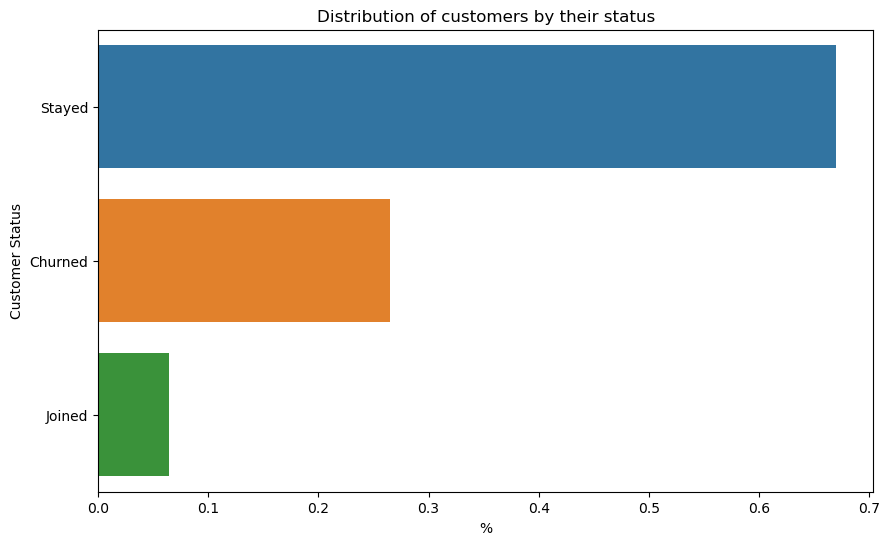

In [106]:
cus_status_pct=df["Customer_Status"].value_counts()/df.shape[0]

plt.figure(figsize=(10,6))
sns.barplot(y=cus_status_pct.index, x=cus_status_pct)
plt.title("Distribution of customers by their status")
plt.ylabel("Customer Status")
plt.xlabel("%")
plt.show()

# Exporting the dataset to PostgreSQL

In [65]:
# Replace these values with the information from your PostgreSQL database
username = "your_username"
password = "your_password"
hostname = "your_hostname"
port = "your_port_number"
dbname = "your_dbname"

# Create a connection to the PostgreSQL database
engine = create_engine(f"postgresql://{username}:{password}@{hostname}:{port}/{db_name}")

# Replace 'telecom_customer' with the name of your PostgreSQL table.
table_name = "telecom_customer"

# Export the dataset
df.to_sql(table_name, engine, index=False, if_exists="replace")